In [1]:
import numpy as np
import pandas as pd
from sklearn import metrics
from openpyxl import load_workbook
from sklearn.tree import export_graphviz
from sklearn.ensemble import RandomForestRegressor
from netCDF4 import Dataset
import matplotlib.pyplot as plt
import multiprocessing
import os
import time
import gloce as gc
from osgeo import gdal
from osgeo import gdalconst
from mpl_toolkits.basemap import Basemap
from glob import glob
from math import ceil
import seaborn as sns
from scipy import stats
from scipy.stats import gaussian_kde
#return im_data, im_width, im_height, im_geotrans, im_proj
def read_img(filename):
    dt = gdal.Open(filename)
    im_width = dt.RasterXSize
    im_height = dt.RasterYSize
    im_bands = dt.RasterCount
    im_geotrans = dt.GetGeoTransform()
    im_proj = dt.GetProjection()
    im_data = dt.ReadAsArray(0,0,im_width,im_height)
    return im_data, im_width, im_height, im_geotrans, im_proj
def write_img(filename, im_proj, im_geotrans, im_data):
    if 'int8' in im_data.dtype.name:
        datatype = gdal.GDT_Byte
    elif 'int16' in im_data.dtype.name:
        datatype = gdal.GDT_UInt16
    else:
        datatype = gdal.GDT_Float32
    if len(im_data.shape) == 3:
        im_bands, im_height, im_width = im_data.shape
    else:
        im_bands, (im_height, im_width) = 1, im_data.shape
    driver = gdal.GetDriverByName("GTiff")
    dataset = driver.Create(filename, im_width, im_height, im_bands, datatype)
    dataset.SetGeoTransform(im_geotrans)
    dataset.SetProjection(im_proj)
    if im_bands == 1:
        dataset.GetRasterBand(1).WriteArray(im_data)
    else:
        for i in range(im_bands):
            dataset.GetRasterBand(i + 1).WriteArray(im_data[i])
spei_path='//weili/User2/mxsun/CESS_230818/SPEI_highRes/'
sm_path='//weili/User2/mxsun/CESS_230818/SPEI_highRes/RF/'
soil_path='//weili/User2/mxsun/CESS_230818/SPEI_highRes/RF/'
drv_path='//weili/User2/mxsun/CESS_230818/Pattern_drive/'

In [2]:
ele_dens=read_img(spei_path+"ele-density_001_231123.tif")[0]
ele_dens.shape

(6500, 7900)

<Figure size 600x800 with 0 Axes>

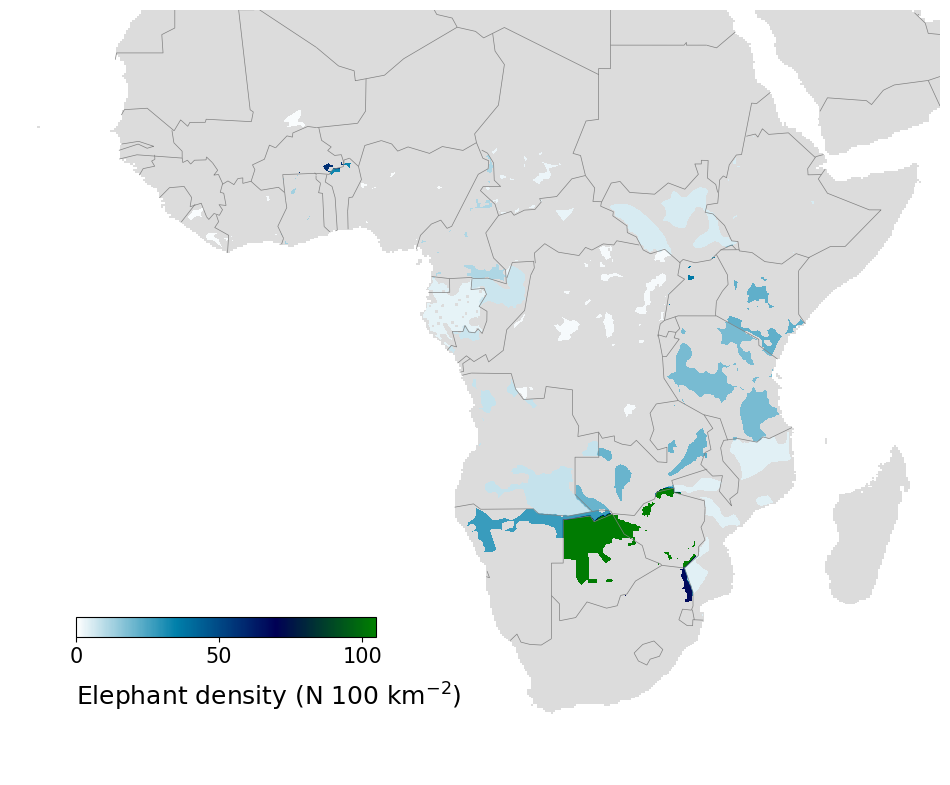

In [5]:
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection
from matplotlib.patches import PathPatch
fig=plt.figure(figsize=(6,8))

dt=ele_dens
#(-26.0, 25.0, 53.0, -40.0)
lon1 = -26;lon2 = 53
lat1 = -40;lat2 = 25
fig = plt.figure(figsize=(12,10)) ##width, height default(8,6)
ax = fig.add_subplot(1,1,1)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
m = Basemap(width=7900,height=6500,llcrnrlon=lon1,llcrnrlat=lat1,urcrnrlon=lon2,urcrnrlat=lat2)
#m.drawmapboundary(linewidth = 0.5)
m.drawcountries(linewidth = 0.5, color = 'gray')
#m.fillcontinents(color = (240/256, 240/256, 240/256))
m.drawlsmask(land_color='gainsboro',ocean_color='None',lakes=False)
#m.drawcoastlines(linewidth=0.5, color='gray')

dt[dt <= 0] = np.nan
#cmap_custom = matplotlib.cm.ocean_r
#cmap_custom.set_under('white')#指定最小值的颜色
im =m.imshow(dt,cmap ="ocean_r",origin='upper',vmin=0)#
position=fig.add_axes([0.18, 0.25, 0.25, 0.02])#位置[左,下,右,宽]
cb = plt.colorbar(im,cax=position,orientation='horizontal')
cb.ax.tick_params(labelsize=15) 
cb.set_label('Elephant density (N 100 km$^{-2}$)',fontsize=18,labelpad=10,loc='left')